**INTRODUCTION**

Introduction: The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Many factors have been shown association with higher insurance price such as age, smoking status, pre-existing disease etc,. Researchers are still exploring more features to help insurance company to predict insurance price with a much higher accuracy.

**AIM**


Aim of the current project is in depth exploration to identify important features relevant to health insurance price as well as best ML model to help company increase the accuracy of health insurance prediction.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

# Use pd.read_excel to read excel files
df = pd.read_excel("/content/Health_insurance_cost.xlsx")

In [3]:
df.head()

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

In [4]:
# No of rows and columns.
df.shape

(1338, 7)

In [5]:
# Datatype and variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
# statistics of the project
df.describe(include="all")

age gender          BMI     Children smoking_status  \
count   1310.000000   1338  1315.000000  1338.000000           1338   
unique          NaN      2          NaN          NaN              2   
top             NaN   male          NaN          NaN             no   
freq            NaN    676          NaN          NaN           1064   
mean      39.166412    NaN    30.638217     1.094918            NaN   
std       14.055378    NaN     6.110302     1.205493            NaN   
min       18.000000    NaN    15.960000     0.000000            NaN   
25%       26.000000    NaN    26.210000     0.000000            NaN   
50%       39.000000    NaN    30.305000     1.000000            NaN   
75%       51.000000    NaN    34.580000     2.000000            NaN   
max       64.000000    NaN    53.130000     5.000000            NaN   

         location  health_insurance_price  
count        1338             1336.000000  
unique          4                     NaN  
top     southeast                     NaN  
freq          364                     NaN  
mean          NaN            13268.527719  
std           NaN            12112.797724  
min           NaN             1121.873900  
25%           NaN             4744.325050  
50%           NaN             9382.033000  
75%           NaN            16604.302645  
max           NaN            63770.428010

In [7]:
# to check the number of missing values in each of the variables
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [8]:
 # i am using data1 just to calculate percentage of missing values in each of the variables
data1 = df.isnull().sum()/len(df)*100
data1

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

In [9]:
# library to examine missing values
import missingno as msno

<Axes: >

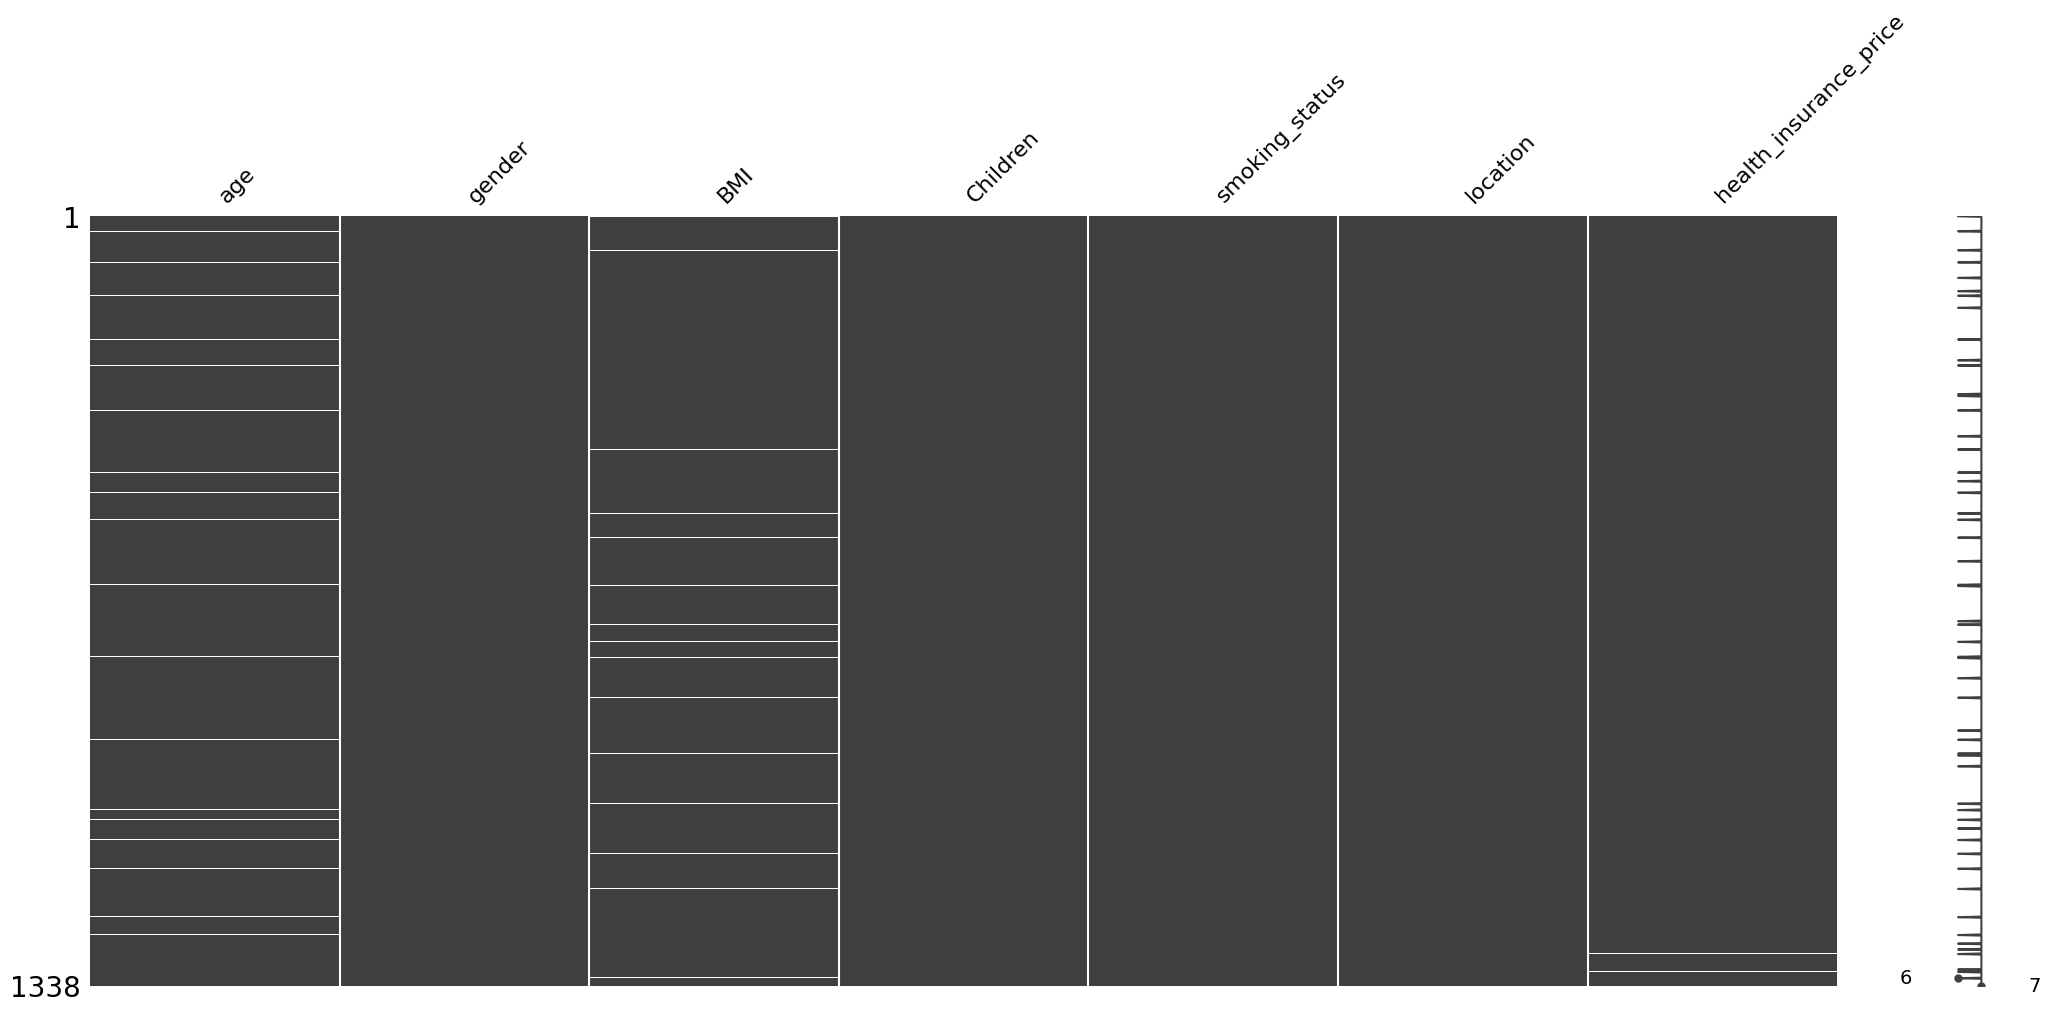

In [10]:
# creating matrix plot to see the pattern in missing values
msno.matrix(df)

<Axes: >

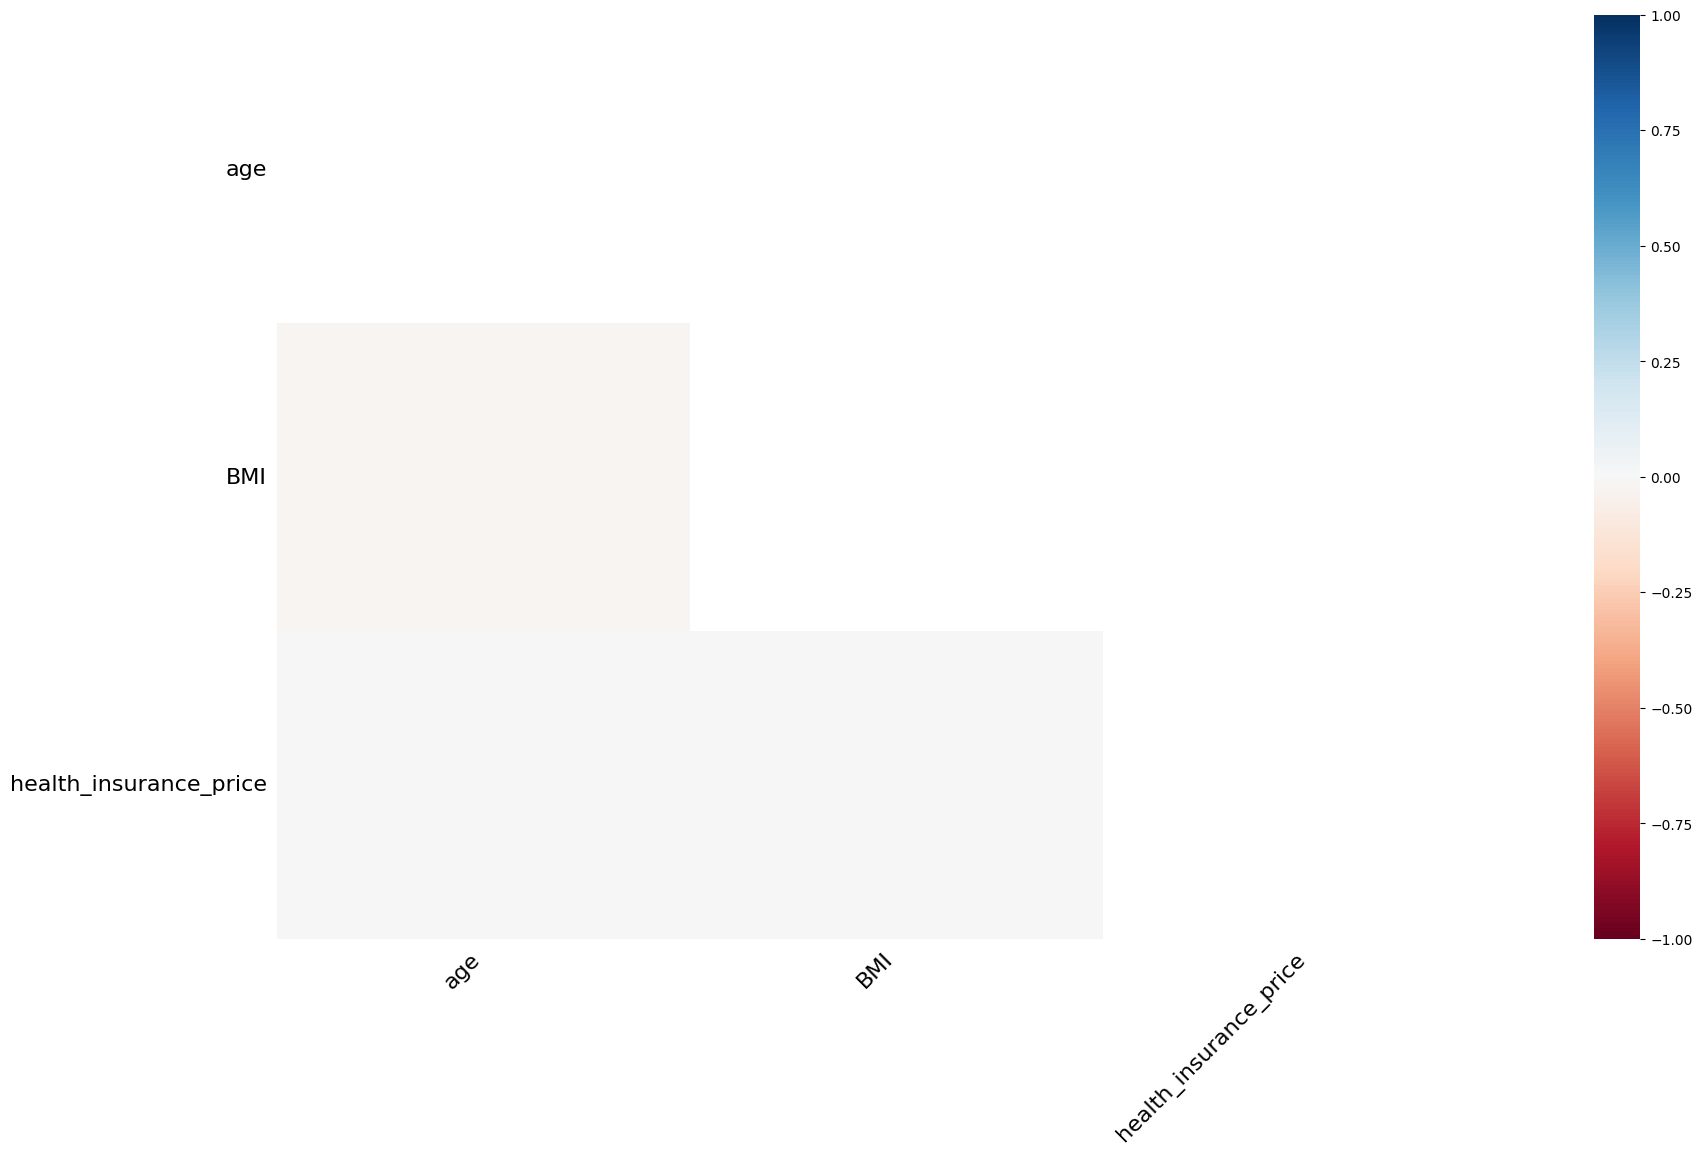

In [11]:
# to check if there is any corelation between misisng values
msno.heatmap(df)

*From the above figure we can observe that there is no corelation between missing values.*

In [12]:
#find the unique values of the secified column.
df.smoking_status.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.location.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [15]:
df.head(5)

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

#Apply encoding before imputing missing values.

In [16]:
# Applying one hot encoding
df_en= pd.get_dummies(df, columns = ['gender', 'smoking_status',"location"])

In [17]:
df_en.head(5) # after encoding this is the look of the dataset

age     BMI  Children  health_insurance_price  gender_female  gender_male  \
0  19.0     NaN         0             16884.92400           True        False   
1  18.0  33.770         1              1725.55230          False         True   
2  28.0  33.000         3              4449.46200          False         True   
3  33.0  22.705         0             21984.47061          False         True   
4  32.0  28.880         0              3866.85520          False         True   

   smoking_status_no  smoking_status_yes  location_northeast  \
0              False                True               False   
1               True               False               False   
2               True               False               False   
3               True               False               False   
4               True               False               False   

   location_northwest  location_southeast  location_southwest  
0               False               False                True  
1               False                True               False  
2               False                True               False  
3                True               False               False  
4                True               False               False

In [18]:
# Using dataframe df_en: convert all column in 0 and 1

# Select all boolean columns
bool_cols = df_en.select_dtypes(include=['bool']).columns

# Convert boolean columns to 0 and 1
df_en[bool_cols] = df_en[bool_cols].astype(int)


In [19]:
df_en.head(5)

age     BMI  Children  health_insurance_price  gender_female  gender_male  \
0  19.0     NaN         0             16884.92400              1            0   
1  18.0  33.770         1              1725.55230              0            1   
2  28.0  33.000         3              4449.46200              0            1   
3  33.0  22.705         0             21984.47061              0            1   
4  32.0  28.880         0              3866.85520              0            1   

   smoking_status_no  smoking_status_yes  location_northeast  \
0                  0                   1                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  1                   0                   0   
4                  1                   0                   0   

   location_northwest  location_southeast  location_southwest  
0                   0                   0                   1  
1                   0                   1                   0  
2                   0                   1                   0  
3                   1                   0                   0  
4                   1                   0                   0

# Dealing with missing values

In [20]:
# Mean imputation
from sklearn.impute import SimpleImputer
df_mean = df_en.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean')
df_mean.iloc[:, :] = mean_imputer.fit_transform(df_mean)

In [21]:
# Median imputation
df_median = df_en.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median')
df_median.iloc[:, :] = median_imputer.fit_transform(df_median)

In [22]:
# Mode imputation
df_mode = df_en.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode.iloc[:, :] = mode_imputer.fit_transform(df_mode)

In [23]:
# Constant imputation
df_constant = df_en.copy(deep=True) # creating a copy for further evaluation
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0)
df_constant.iloc[:, :] = constant_imputer.fit_transform(df_constant)

Fancyimput

fancyimpute is a library for missing data imputation algorithms. Fancyimpute use machine learning algorithm to impute missing values. Fancyimpute uses all the column to impute the missing values. There are two ways missing data can be imputed using Fancyimpute

KNN or K-Nearest Neighbor
MICE or Multiple Imputation by Chained Equation

In [24]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=404ce333e6db665467a865e8075eed71d473f6ac339d32d4cfcdb8b40bdb24d9
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=794dc58280331c3bd42f882ac8bf6e0b80f159c859e7b0ce3c7327953b3dc8cf
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [25]:
# KNN imputation for missing values
from fancyimpute import KNN
knn_imputer = KNN()
df_knn = df_en.copy(deep=True)
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

Imputing row 1/1338 with 1 missing, elapsed time: 0.297
Imputing row 101/1338 with 0 missing, elapsed time: 0.298
Imputing row 201/1338 with 0 missing, elapsed time: 0.300
Imputing row 301/1338 with 0 missing, elapsed time: 0.301
Imputing row 401/1338 with 0 missing, elapsed time: 0.302
Imputing row 501/1338 with 0 missing, elapsed time: 0.302
Imputing row 601/1338 with 0 missing, elapsed time: 0.303
Imputing row 701/1338 with 0 missing, elapsed time: 0.304
Imputing row 801/1338 with 0 missing, elapsed time: 0.306
Imputing row 901/1338 with 0 missing, elapsed time: 0.307
Imputing row 1001/1338 with 0 missing, elapsed time: 0.308
Imputing row 1101/1338 with 0 missing, elapsed time: 0.309
Imputing row 1201/1338 with 0 missing, elapsed time: 0.309
Imputing row 1301/1338 with 0 missing, elapsed time: 0.311


In [26]:
#Mice imputation for missing values
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
df_MICE = df_en.copy(deep=True)
df_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_MICE)

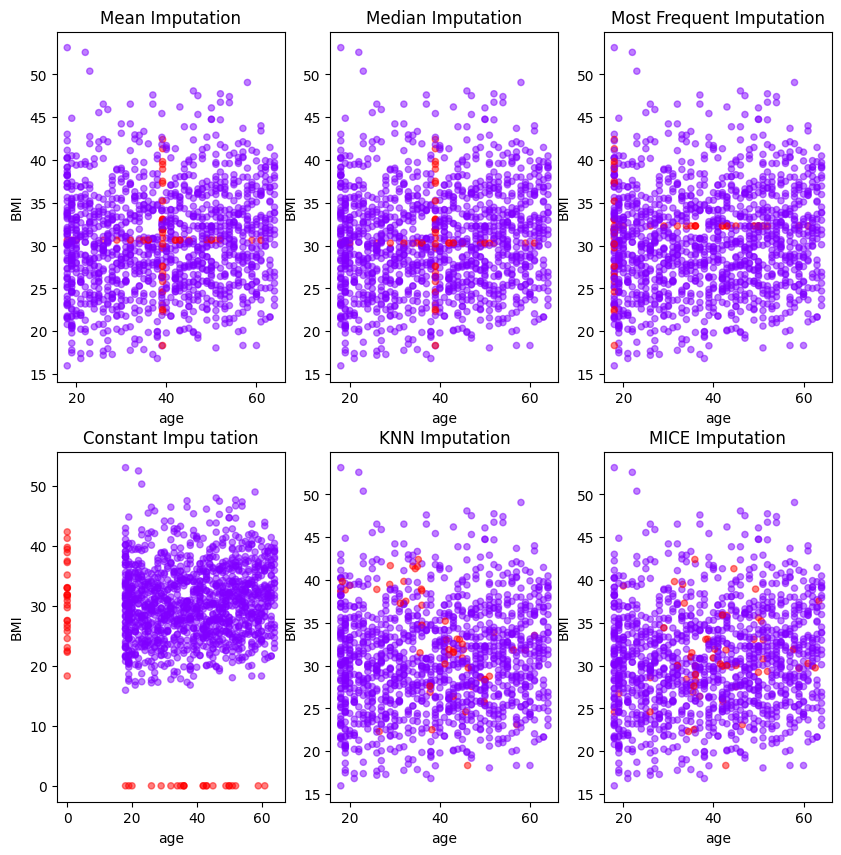

In [27]:
# as we have learnt in EDA sessions ploting each of the imputation results and picking the best among all
from matplotlib import pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
nullity = df_en['age'].isnull() + df_en['BMI'].isnull() # we want to specify the color values for the data points based on the nullity values
imputations = {'Mean Imputation': df_mean,
               'Median Imputation': df_median,
               'Most Frequent Imputation': df_mode,
               'Constant Impu tation': df_constant,
               'KNN Imputation': df_knn,
              'MICE Imputation': df_MICE}
#This loop iterates through the subplot axes and the keys of the imputations dictionary simultaneously using the zip() function.
#axes.flatten() is used to flatten the 2D array of subplot axes into a 1D array.
for ax, df_key in zip(axes.flatten(), imputations):

  #For each iteration of the loop, it accesses the DataFrame associated with the current df_key from the imputations dictionary.
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
    #alpha=0.5 controls the transparency of the data points in the scatter plot.
    #c=nullity specifies the color values for the data points based on the nullity values. This could be a measure of missingness in the dataset.
    #cmap='rainbow' specifies the colormap to be used for coloring the data points.
    #ax=ax assigns the current subplot axis to which the scatter plot will be added.
    #colorbar=False suppresses the display of the colorbar.


In [28]:
#checking the statistics of the project after performing knn imputation
df_knn.describe(include="all")

age          BMI     Children  health_insurance_price  \
count  1338.000000  1338.000000  1338.000000             1338.000000   
mean     39.190753    30.711828     1.094918            13265.955854   
std      13.960328     6.111971     1.205493            12105.320304   
min      18.000000    15.960000     0.000000             1121.873900   
25%      27.000000    26.315000     0.000000             4746.521225   
50%      39.000000    30.495000     1.000000             9382.033000   
75%      51.000000    34.700000     2.000000            16584.318157   
max      64.000000    53.130000     5.000000            63770.428010   

       gender_female  gender_male  smoking_status_no  smoking_status_yes  \
count    1338.000000  1338.000000        1338.000000         1338.000000   
mean        0.494768     0.505232           0.795217            0.204783   
std         0.500160     0.500160           0.403694            0.403694   
min         0.000000     0.000000           0.000000            0.000000   
25%         0.000000     0.000000           1.000000            0.000000   
50%         0.000000     1.000000           1.000000            0.000000   
75%         1.000000     1.000000           1.000000            0.000000   
max         1.000000     1.000000           1.000000            1.000000   

       location_northeast  location_northwest  location_southeast  \
count         1338.000000         1338.000000         1338.000000   
mean             0.242152            0.242900            0.272048   
std              0.428546            0.428995            0.445181   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            1.000000   
max              1.000000            1.000000            1.000000   

       location_southwest  
count         1338.000000  
mean             0.242900  
std              0.428995  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

In [29]:
#checking the statistics after performing Mice imputation
df_MICE.describe()

age          BMI     Children  health_insurance_price  \
count  1338.000000  1338.000000  1338.000000             1338.000000   
mean     39.221552    30.642142     1.094918            13282.167197   
std      13.971996     6.073035     1.205493            12117.188785   
min      18.000000    15.960000     0.000000             1121.873900   
25%      27.000000    26.315000     0.000000             4746.521225   
50%      39.000000    30.300000     1.000000             9388.753650   
75%      51.000000    34.496250     2.000000            16639.912515   
max      64.000000    53.130000     5.000000            63770.428010   

       gender_female  gender_male  smoking_status_no  smoking_status_yes  \
count    1338.000000  1338.000000        1338.000000         1338.000000   
mean        0.494768     0.505232           0.795217            0.204783   
std         0.500160     0.500160           0.403694            0.403694   
min         0.000000     0.000000           0.000000            0.000000   
25%         0.000000     0.000000           1.000000            0.000000   
50%         0.000000     1.000000           1.000000            0.000000   
75%         1.000000     1.000000           1.000000            0.000000   
max         1.000000     1.000000           1.000000            1.000000   

       location_northeast  location_northwest  location_southeast  \
count         1338.000000         1338.000000         1338.000000   
mean             0.242152            0.242900            0.272048   
std              0.428546            0.428995            0.445181   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            1.000000   
max              1.000000            1.000000            1.000000   

       location_southwest  
count         1338.000000  
mean             0.242900  
std              0.428995  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

Knn and Mice seems to have performed well. you can choose each of them and observed the metircs of each model. I am proceeding with KNN here.

In [30]:
df_knn.head(5) #after choosing KNN imputed dataset, again checking the top 5 rows

age       BMI  Children  health_insurance_price  gender_female  \
0  19.0  38.84134         0             16884.92400              1   
1  18.0  33.77000         1              1725.55230              0   
2  28.0  33.00000         3              4449.46200              0   
3  33.0  22.70500         0             21984.47061              0   
4  32.0  28.88000         0              3866.85520              0   

   gender_male  smoking_status_no  smoking_status_yes  location_northeast  \
0            0                  0                   1                   0   
1            1                  1                   0                   0   
2            1                  1                   0                   0   
3            1                  1                   0                   0   
4            1                  1                   0                   0   

   location_northwest  location_southeast  location_southwest  
0                   0                   0                   1  
1                   0                   1                   0  
2                   0                   1                   0  
3                   1                   0                   0  
4                   1                   0                   0

# data visualization
Univariate analysis

Here the aim is to check the distribution of the data.
If it is normally distributed or skewed for numerical value.
If it is a categorical value then we have to check if categories are balanced on unblanced.

In [31]:
# Please note I am not using knn imputed dataset for analysis instead raw data.
df.head(5)


age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

<Axes: xlabel='age', ylabel='Count'>

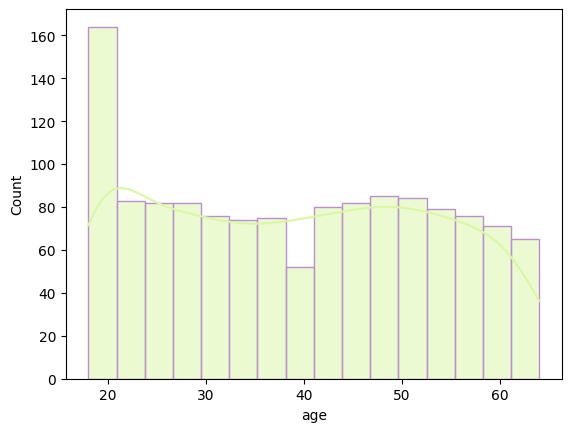

In [32]:
# importing data visualisation package
#before we plot histogram there are a few points to consider
# 1. Bins should be of same size
# 2. include all of the data
# 3. use whole number
# 4. choose to 5 to 20 bins
# min=18 max=64
# binwidth= range/16 I am choosing 16 as number of bins here and it gives value almost equal to 3
# from min value i.e 18 to max value 64 you can create bins of width 3
import seaborn as sns
sns.histplot(data = df,x="age",bins=16,color="#DAF7A6",edgecolor='#BB8FCE', kde = True)

Looks like age of most of the customers fall in the range of 18-21 and there are a lesser number of customers in the range of 39-41 comparatively.

Note: width of each bin is 3. starting from 18 which is a minimum value

<ipython-input-33-67e1daed57ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
<ipython-input-33-67e1daed57ad>:1: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])


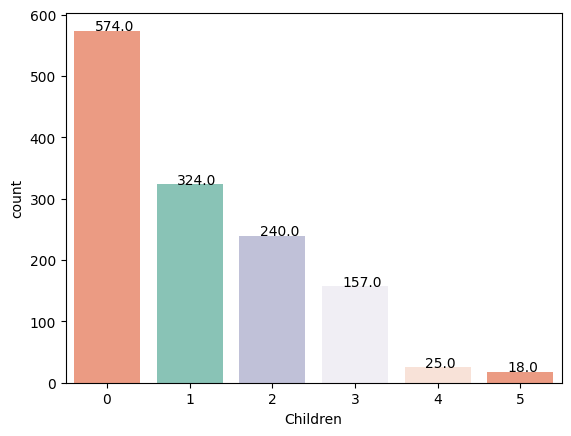

In [33]:
ax=sns.countplot(x=df.Children, palette=["#fc9272","#7fcdbb","#bcbddc","#efedf5","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Seemingly, majority of the customers in the project have no children.
That said, customers with 1 children are more followed by 2 and so on.
Moreover, There are very few customers with children 4 and 5.

<ipython-input-34-cb0b7f774a67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])


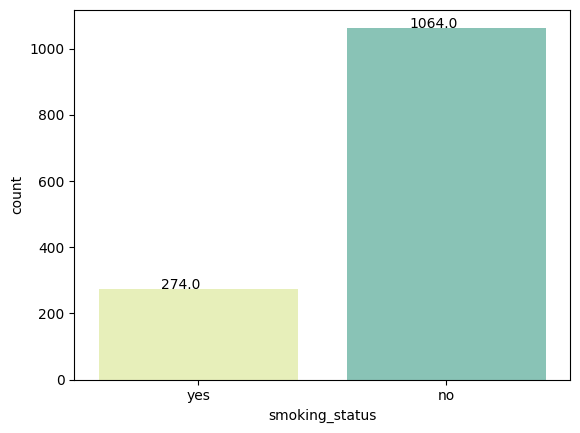

In [34]:
ax =sns.countplot(x=df.smoking_status, palette=["#edf8b1", "#7fcdbb"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In the dataset, vast majority of customers are non smokers.

<ipython-input-35-c80edbf4c753>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])


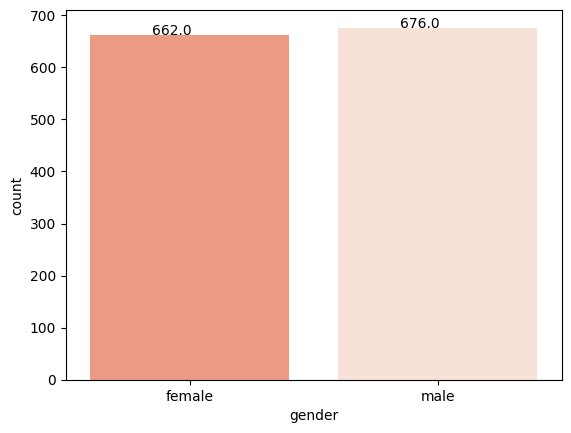

In [35]:
ax =sns.countplot(x=df.gender, palette=["#fc9272","#fee0d2"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

The proportion of male and female looks almost equal

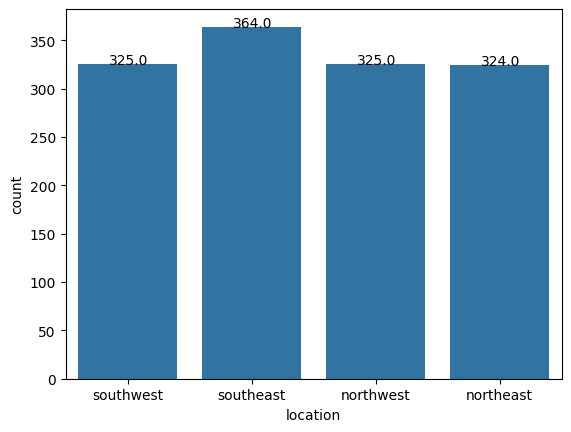

In [36]:
ax =sns.countplot(x=df.location)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

As far as location is concerned, southeast people are the highest whereas customers from other locations are almost equal in number.

<Axes: xlabel='BMI', ylabel='Count'>

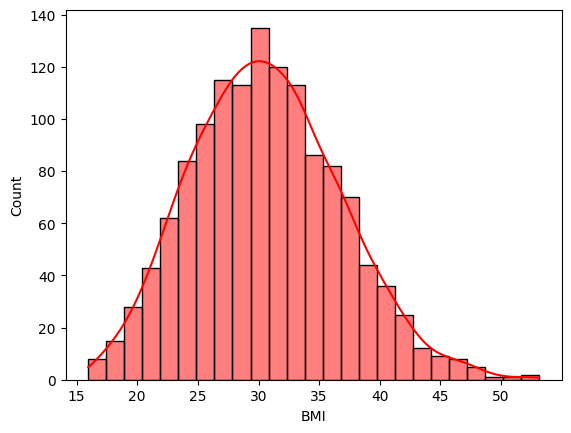

In [37]:
sns.histplot(data = df['BMI'],color='red', kde = True)  # checking the distribution of numerical variable

From the historgram it looks like BMI of customers follows a normal distribution. However, let's verify

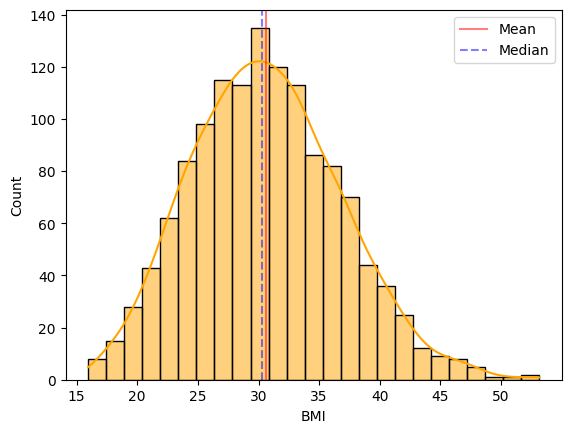

In [38]:
sns.histplot(data = df['BMI'],color='orange', kde = True)
plt.axvline(x=df.BMI.mean(),color='red',alpha=0.5,label='Mean') # function used to add a vertical line
plt.axvline(x=df.BMI.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

Mean,Median and mode should be equal for Normal Distribution(ND) but it is not same here.
Having said that most of the BMI values fall between 20 to 40

<Axes: ylabel='age'>

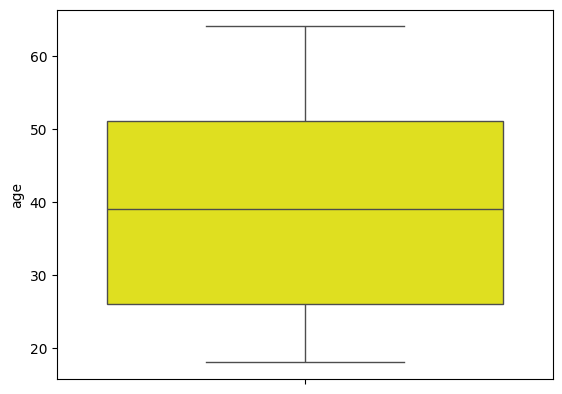

In [39]:
#dealing with outliers
sns.boxplot(df["age"],color="yellow")


I don't see any outliers here for age feature

<Axes: ylabel='BMI'>

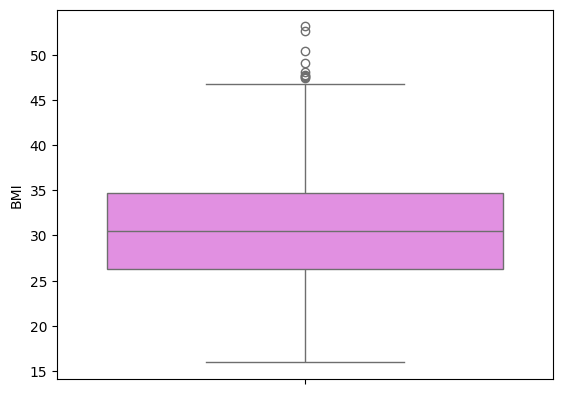

In [40]:
sns.boxplot(df_knn["BMI"], color="violet")

It appears that we have outliers in BMI feature.
The presence of outliers can dramatically change the magnitude of regression coefficients and even the direction of coefficient signs (i.e., from positive to negative or vice versa).

In [41]:
#I have created a copy of the data_knn to perform zscore before performing IQR. creating a copy of data_knn after performing IQR does not make sense as we would have already dealt with outliers
df_knn_c=df_knn.copy()

In [42]:
#Dealing with outliers

# Here I am using IQR to remove outliers.
Q1 = df_knn['BMI'].quantile(0.25)
Q3 = df_knn['BMI'].quantile(0.75)
print(Q3, Q1)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

34.7 26.315
8.385000000000002
47.2775
13.737499999999999


In [43]:
df_knn.shape

(1338, 12)

In [44]:
df_knn = df_knn[df_knn.BMI < upper_bound]
df_knn = df_knn[df_knn.BMI > lower_bound]
df_knn.shape

(1329, 12)

<Axes: ylabel='BMI'>

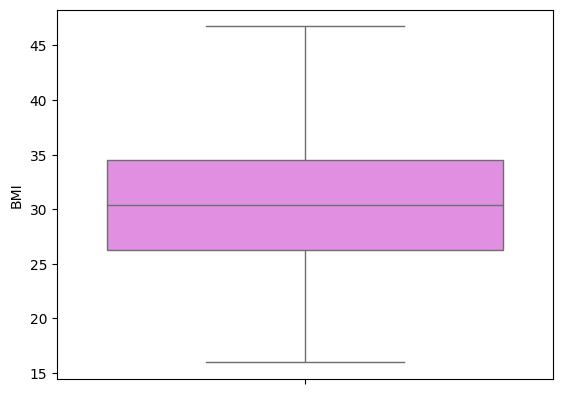

In [45]:
sns.boxplot(df_knn["BMI"], color="violet")

we can see that we have handled the outliers pretty well.
Having said that, let's use z-score and check how it works

In [46]:
#I have created a copy of the data_knn to perform zscore before performing IQR. creating a copy of data_knn after performing IQR does not make sense as we would have already dealt with outliers
#data_knn_c=data_knn.copy()

In [47]:
df_knn_c.shape

(1338, 12)

<Axes: ylabel='BMI'>

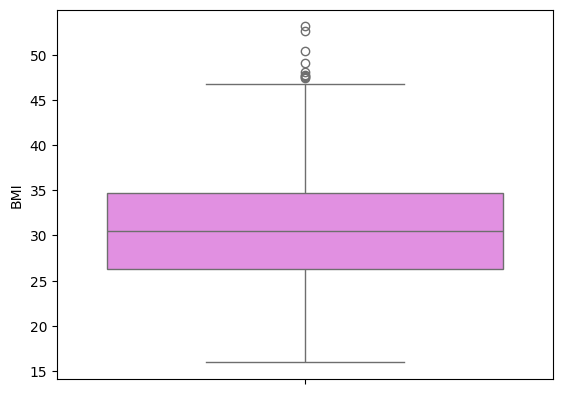

In [48]:
sns.boxplot(df_knn_c["BMI"], color="violet") # checking the outliers

In [49]:
df_knn_c['zscore'] = (df_knn_c.BMI - df_knn_c.BMI.mean())/df_knn_c.BMI.std(ddof=0)
df_knn_c['zscore'].unique()

array([ 1.33059391e+00,  5.00544853e-01,  3.74515482e-01, -1.31051358e+00,
       -2.99823494e-01, -8.13761451e-01,  4.46532265e-01, -4.86412434e-01,
       -1.44332711e-01, -7.97394000e-01, -7.35197687e-01, -7.23740471e-01,
        6.03659794e-01,  1.49077563e+00,  1.86886375e+00, -1.00035039e+00,
        1.11580725e-02, -1.12392464e+00,  1.56933939e+00,  7.50966851e-01,
        8.66357380e-01,  2.76310776e-01,  5.54557441e-01,  1.97747012e-01,
       -4.39765199e-01, -4.89685924e-01, -1.24831727e+00,  3.37688717e-01,
       -2.18126197e+00,  9.14641360e-01,  8.00069204e-01, -7.19648608e-01,
       -3.45652356e-01, -3.93117964e-01,  9.31008811e-01, -1.68369146e+00,
        3.68786874e-01, -1.62231352e+00,  9.75200928e-01,  1.50386959e+00,
       -6.73001373e-01,  9.68653948e-01, -1.46191250e+00,  1.44315627e-02,
        1.03739724e+00,  1.07831587e+00,  1.30173157e+00,  6.64219362e-01,
       -1.01180761e+00,  7.34599401e-01,  8.04161067e-01,  4.77630422e-01,
       -4.43857061e-01,  

In [50]:
#usually we will consider anything more than 3SD as an outlier.
df_knn_c[(df_knn_c['zscore']>3)]

age    BMI  Children  health_insurance_price  gender_female  \
116   58.0  49.06         0              11381.3254              0   
847   23.0  50.38         1               2438.0552              0   
1047  22.0  52.58         1              44501.3982              0   
1317  18.0  53.13         0               1163.4627              0   

      gender_male  smoking_status_no  smoking_status_yes  location_northeast  \
116             1                  1                   0                   0   
847             1                  1                   0                   0   
1047            1                  0                   1                   0   
1317            1                  1                   0                   0   

      location_northwest  location_southeast  location_southwest    zscore  
116                    0                   1                   0  3.003128  
847                    0                   1                   0  3.219178  
1047                   0                   1                   0  3.579262  
1317                   0                   1                   0  3.669283

we can see we have only 4 rows with zscore more than 3.therefore, let's try removing them and observe the boxplot.

In [51]:
#removing those rows
# delete a few specified rows at index values 116, 847, 1047,1317.
# Note that the index values do not always align to row numbers.
df_knn_c = df_knn_c.drop(labels=[116,847,1047,1317], axis=0)

In [52]:
df_knn_c.shape

(1334, 13)

<Axes: ylabel='BMI'>

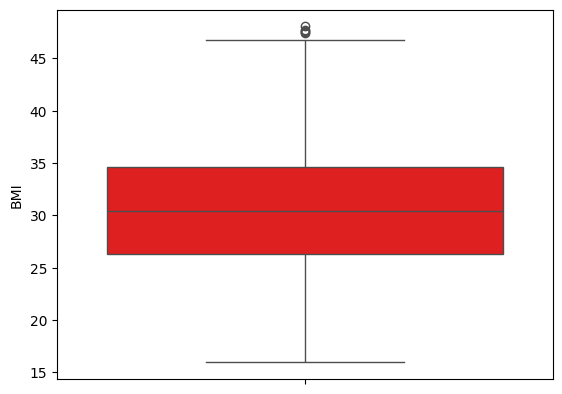

In [53]:
sns.boxplot(df_knn_c["BMI"], color="red") # after dealing with outliers using z-score

Clearly, z-score did not perform well, so, let's use IQR.

Note: For outliers, statistically it is good to treat extreme outliers (+3 * IQR and -3 * IQR). Minor outliers are OK. As at the end we are using DT, RF ML models etc.

#Bivaritae Analysis

In [54]:
df.head(5) # again using the raw dataset

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

# Numerical-Numerical variables

<Axes: xlabel='age', ylabel='health_insurance_price'>

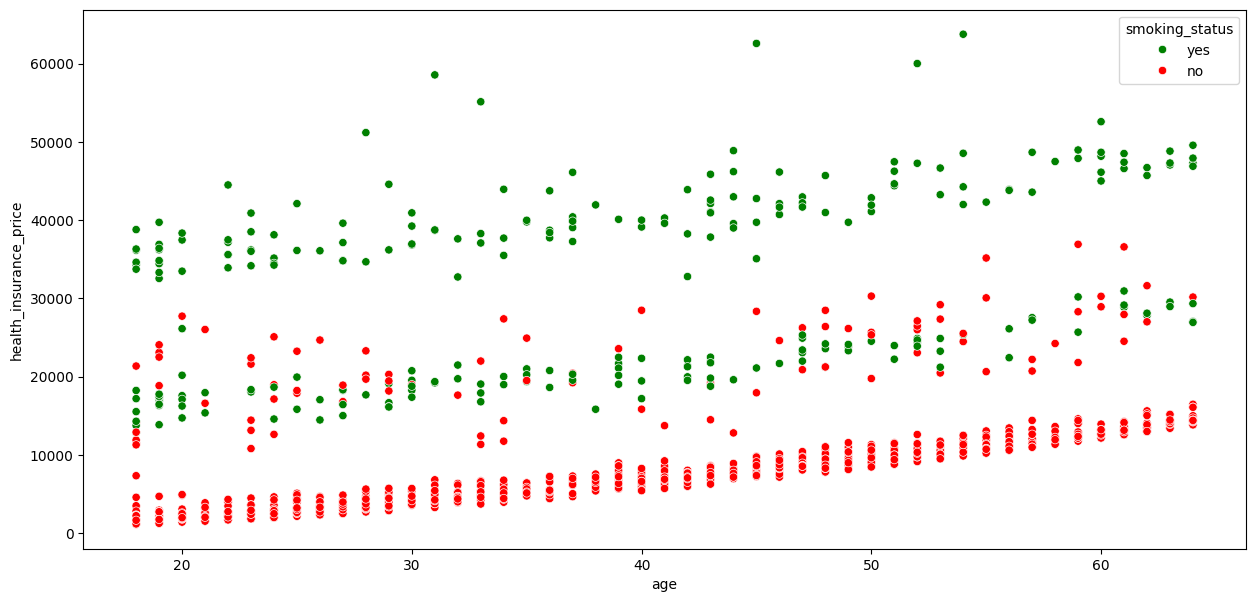

In [55]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

Observation:

It appears to us that is Relation between age and insurance_price as we see that increasing in age causing increase in price in case of non-smokers
Having said that, Smokers insurance prices are higher in Comparison to non smokers.

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

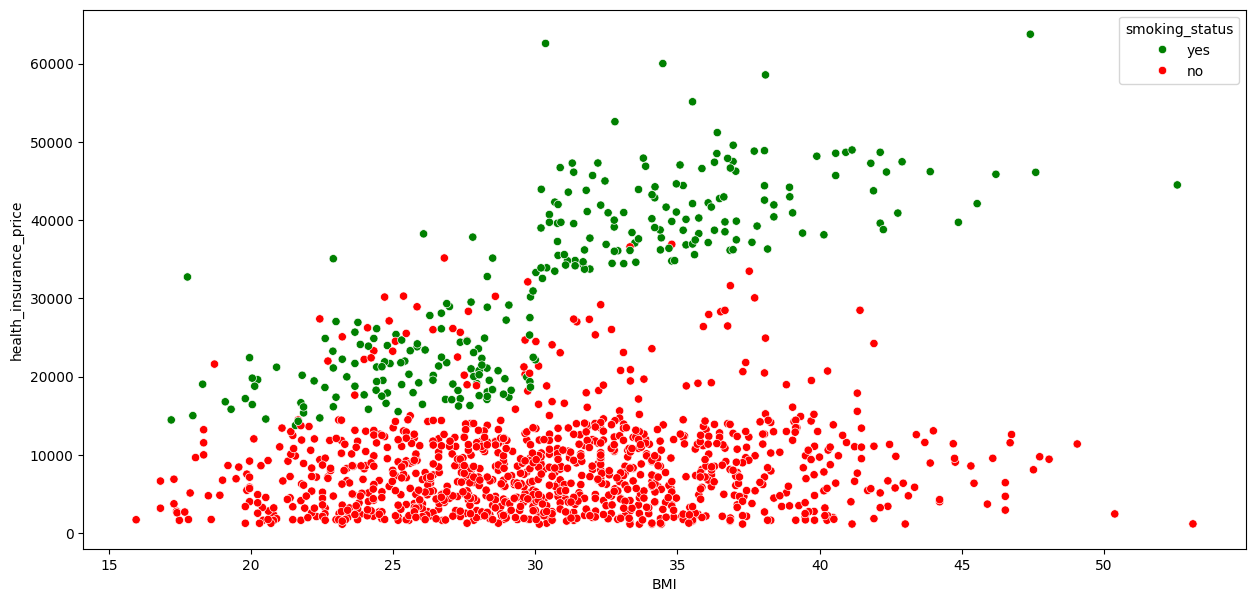

In [56]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['BMI'], y = df['health_insurance_price'], hue = df['smoking_status'], palette=['green','red'])

It appears to us as the BMI of smokers increases their insurance price escalates.

<Axes: xlabel='age', ylabel='health_insurance_price'>

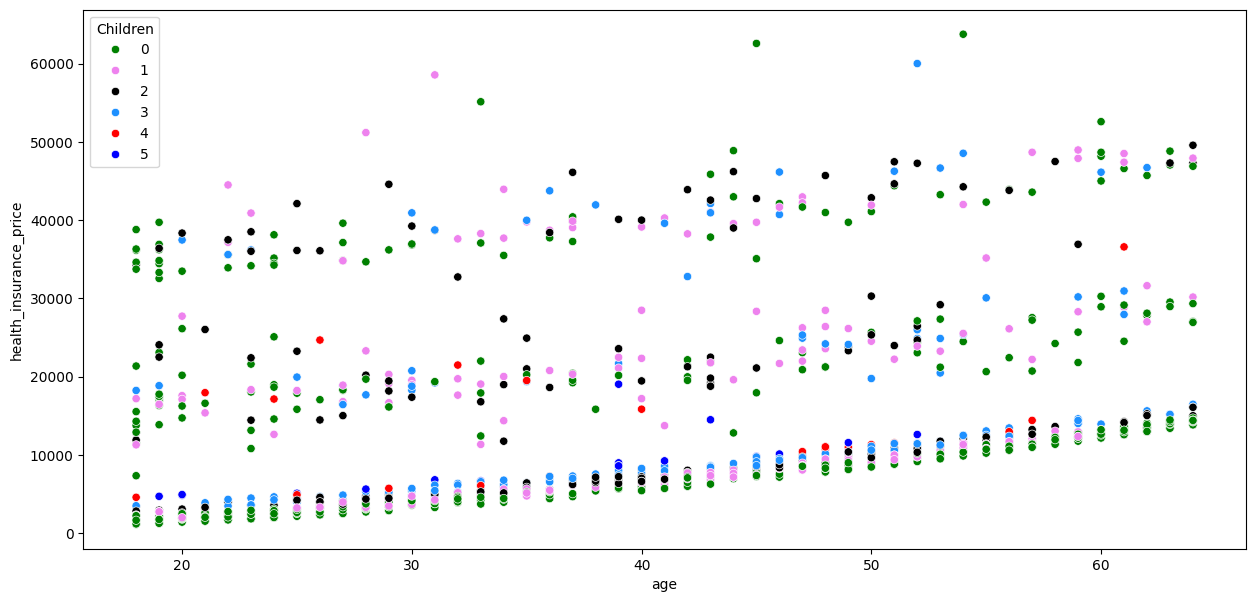

In [57]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['age'], y = df['health_insurance_price'], hue = df['Children'], palette=['green','violet','black','dodgerblue','red',"blue"])

It is tough to say there is an impact of number of children of people with any age on insurance price.

ex: we can't say elder people with more children paid more insurance price nor we can say younger peopl with more children paid more insurance price.

Similarly, we can't say younger people with less children paid more insurance price nor we can say elder peopl with less children paid more insurance price.

<Axes: xlabel='BMI', ylabel='health_insurance_price'>

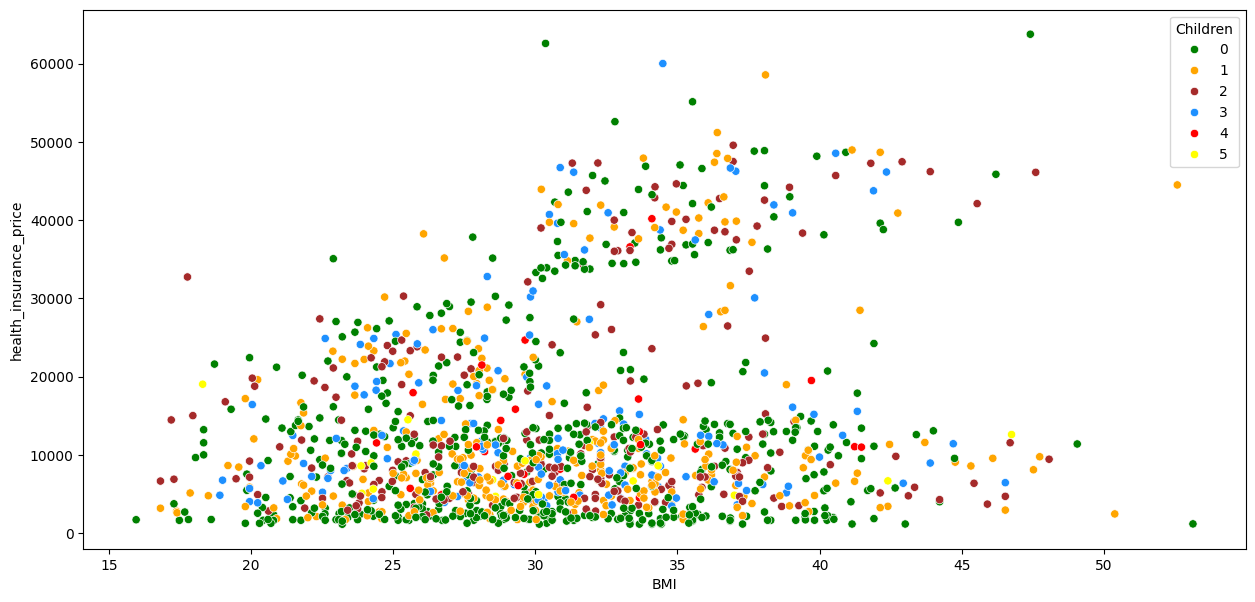

In [58]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['BMI'], y = df['health_insurance_price'], hue = df['Children'], palette=['green','orange','brown','dodgerblue','red',"yellow"])

It seems BMI is not having much impact on health insurance. Smoking status is having much higher impact on health insurance price as per above figures.


# Categorical- Numerical Variables

In [59]:
df.head(5)

age  gender     BMI  Children smoking_status   location  \
0  19.0  female     NaN         0            yes  southwest   
1  18.0    male  33.770         1             no  southeast   
2  28.0    male  33.000         3             no  southeast   
3  33.0    male  22.705         0             no  northwest   
4  32.0    male  28.880         0             no  northwest   

   health_insurance_price  
0             16884.92400  
1              1725.55230  
2              4449.46200  
3             21984.47061  
4              3866.85520

<ipython-input-60-dfc510a69ca8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['dodgerblue','green'])


<Axes: xlabel='gender', ylabel='health_insurance_price'>

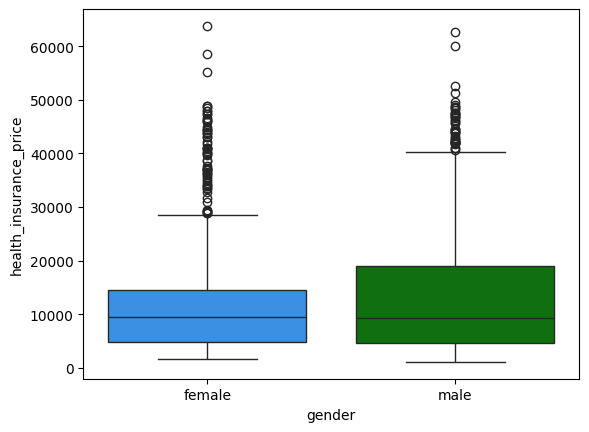

In [60]:
sns.boxplot(data=df, x="gender", y="health_insurance_price",palette=['dodgerblue','green'])

<ipython-input-61-f152576d01bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="smoking_status", y="health_insurance_price",palette=['violet','red'])


<Axes: xlabel='smoking_status', ylabel='health_insurance_price'>

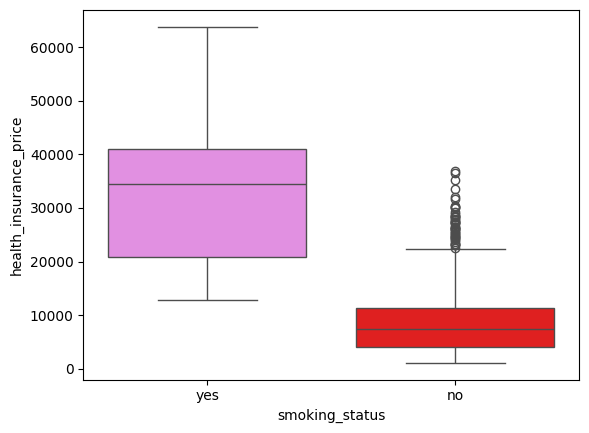

In [61]:
#box plot for smoking status vs health_insurance_price
sns.boxplot(data=df, x="smoking_status", y="health_insurance_price",palette=['violet','red'])

There is an impact of smoking status on health insurance price. if the status is yes then health insurance price range is high for them.

<ipython-input-62-583795055659>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="health_insurance_price",palette=['green','violet','red','dodgerblue'])


<Axes: xlabel='location', ylabel='health_insurance_price'>

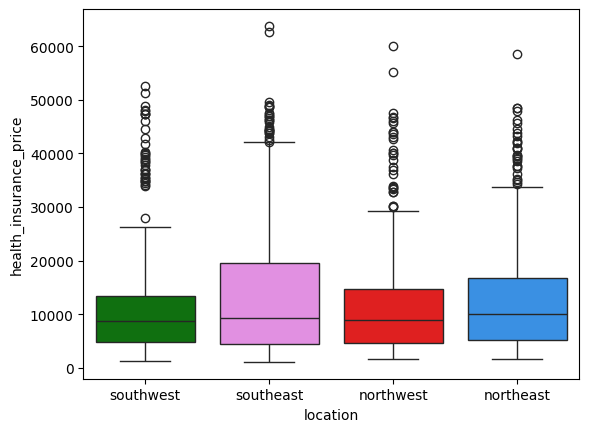

In [62]:
# using box plot for location vs health_insurance_price
# Boxplots allow us a simple way to compare groups and view dispersion and spread in data.

sns.boxplot(data=df, x="location", y="health_insurance_price",palette=['green','violet','red','dodgerblue'])

The median value of all the groups looks almost equal.so, we can't see much of an impact of location on health insurance price

<ipython-input-63-f6d25157ae73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

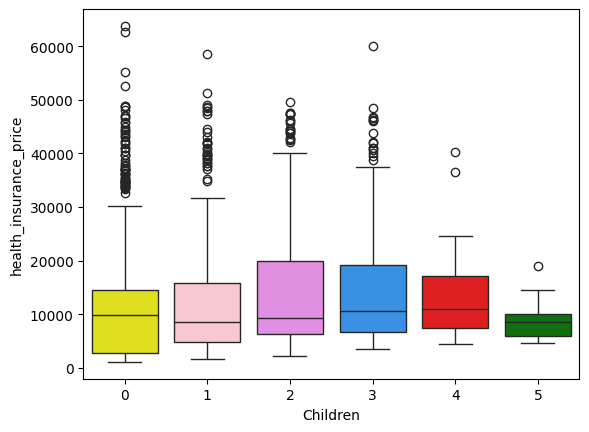

In [63]:
#box plot between children and insurance price

sns.boxplot(data=df, x="Children", y="health_insurance_price",palette=['yellow','pink','violet','dodgerblue',"red","green"])

Looking at each of the groups median value, we can say that there is not much of an impact of number of children on health insurance price

<ipython-input-64-390450a9adf0>:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=df, x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])


<Axes: xlabel='Children', ylabel='health_insurance_price'>

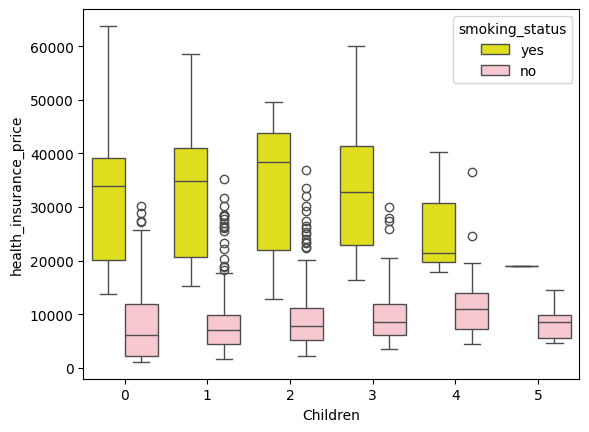

In [64]:
sns.boxplot(data=df, x="Children", y="health_insurance_price",hue="smoking_status", palette=['yellow','pink','violet','dodgerblue',"red","green"])

<ipython-input-65-b5add6bf4f9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])
<ipython-input-65-b5add6bf4f9e>:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])


<Axes: xlabel='Children', ylabel='age'>

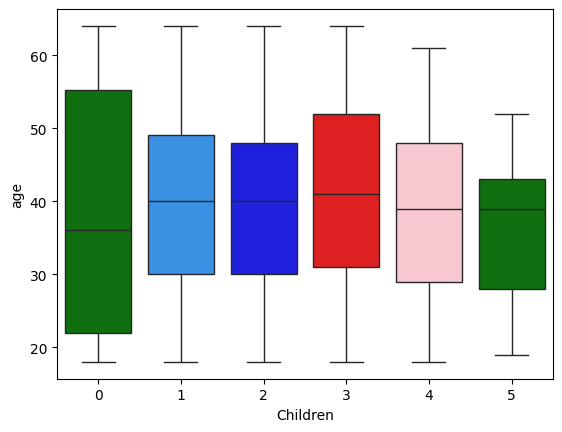

In [65]:
#box plot between children and age

sns.boxplot(data=df, x="Children", y="age",palette=['green','dodgerblue',"blue","red","pink"])

From this figure we can't say elder people have more children or have less children. Similarly, we can't say that younger people have more children or have less children. Basically, number of children is not determined by age.

<ipython-input-66-839fe01d6df1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])
<ipython-input-66-839fe01d6df1>:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])


<Axes: xlabel='Children', ylabel='BMI'>

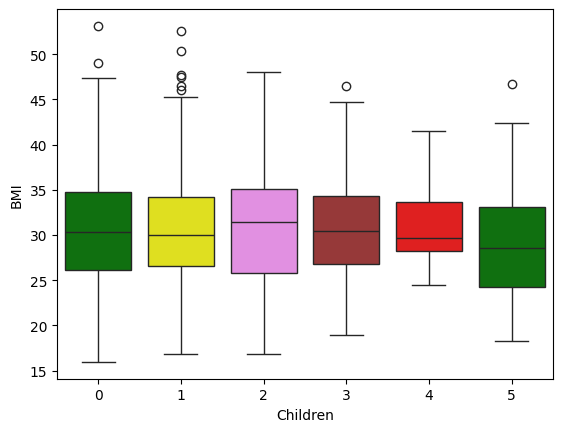

In [66]:
# box plot between children and BMI

sns.boxplot(data=df, x="Children", y="BMI",palette=['Green','yellow',"violet","brown","red"])

Seemingly, there is no effect of number of children on people's BMI

In [67]:
# checking the correlation

df_corr = pd.DataFrame(df_knn)
print(df_corr.corr(method = 'spearman'))

                             age       BMI  Children  health_insurance_price  \
age                     1.000000  0.092537  0.053706                0.533113   
BMI                     0.092537  1.000000  0.017608                0.117599   
Children                0.053706  0.017608  1.000000                0.133351   
health_insurance_price  0.533113  0.117599  0.133351                1.000000   
gender_female           0.020233 -0.043856 -0.017342               -0.013824   
gender_male            -0.020233  0.043856  0.017342                0.013824   
smoking_status_no       0.020570 -0.003057 -0.016300               -0.661591   
smoking_status_yes     -0.020570  0.003057  0.016300                0.661591   
location_northeast      0.000304 -0.126150 -0.027658                0.047263   
location_northwest      0.001184 -0.117972  0.034324               -0.021529   
location_southeast     -0.019989  0.230326 -0.015881                0.017735   
location_southwest      0.019145  0.0063

Barring Age which has moderate co-relation, we don't see much of the corelation between the target variable and I variables.

In [68]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = df_knn.drop(['health_insurance_price'], axis=1)

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_vif.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_df)

               feature       VIF
0                  age  1.013592
1                  BMI  1.088373
2             Children  1.003823
3        gender_female       inf
4          gender_male       inf
5    smoking_status_no       inf
6   smoking_status_yes       inf
7   location_northeast       inf
8   location_northwest       inf
9   location_southeast       inf
10  location_southwest       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


You can observe VIF is infinite for many columns that means there exists perfect correlation between them. so, let's drop 1 column from each of the categories as below

In [69]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X_vif = df_knn.drop(['health_insurance_price',"gender_female","smoking_status_no","location_southwest"], axis=1)

# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_vif.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_df)

              feature        VIF
0                 age   7.806095
1                 BMI  10.751487
2            Children   1.807568
3         gender_male   2.003648
4  smoking_status_yes   1.264723
5  location_northeast   1.833465
6  location_northwest   1.839118
7  location_southeast   2.132683


In [70]:
X_vif.head(5)

age       BMI  Children  gender_male  smoking_status_yes  \
0  19.0  38.84134         0            0                   1   
1  18.0  33.77000         1            1                   0   
2  28.0  33.00000         3            1                   0   
3  33.0  22.70500         0            1                   0   
4  32.0  28.88000         0            1                   0   

   location_northeast  location_northwest  location_southeast  
0                   0                   0                   0  
1                   0                   0                   1  
2                   0                   0                   1  
3                   0                   1                   0  
4                   0                   1                   0

VIF>5 is not accepted. hence drop those columns

In [71]:
X_vif.head(5)

age       BMI  Children  gender_male  smoking_status_yes  \
0  19.0  38.84134         0            0                   1   
1  18.0  33.77000         1            1                   0   
2  28.0  33.00000         3            1                   0   
3  33.0  22.70500         0            1                   0   
4  32.0  28.88000         0            1                   0   

   location_northeast  location_northwest  location_southeast  
0                   0                   0                   0  
1                   0                   0                   1  
2                   0                   0                   1  
3                   0                   1                   0  
4                   0                   1                   0

In [72]:
X=X_vif.drop(["age","BMI"], axis=1)

In [73]:
# VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_df)

              feature       VIF
0            Children  1.573202
1         gender_male  1.725221
2  smoking_status_yes  1.245483
3  location_northeast  1.314837
4  location_northwest  1.325890
5  location_southeast  1.377983


After dropping the columns with VIF>5 we are left with minimum no. of features.

In the interest of avoiding multicolinearity we lost many of the features.

Therefore,I am not using Linear regression as it did not perform well when I checked it because of which I have chosen non -parametric algorithms. like rf, DT and SVM (Support Vector Machines with Gaussian Kernels)

In [74]:
# Separating I variables and the dependent variable
X=df_knn.drop(("health_insurance_price"), axis=1)

In [75]:
y=df_knn["health_insurance_price"]

In [76]:
X.head(5)

age       BMI  Children  gender_female  gender_male  smoking_status_no  \
0  19.0  38.84134         0              1            0                  0   
1  18.0  33.77000         1              0            1                  1   
2  28.0  33.00000         3              0            1                  1   
3  33.0  22.70500         0              0            1                  1   
4  32.0  28.88000         0              0            1                  1   

   smoking_status_yes  location_northeast  location_northwest  \
0                   1                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   1   
4                   0                   0                   1   

   location_southeast  location_southwest  
0                   0                   1  
1                   1                   0  
2                   1                   0  
3                   0                   0  
4                   0                   0

In [77]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [78]:
X.shape

(1329, 11)

#Feature selection

In [79]:
# Backward feature elimination technique.
# note: you can choose a different one proceed
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=8) # taking only 8 features
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['age', 'BMI', 'Children', 'gender_female', 'gender_male',
       'smoking_status_no', 'smoking_status_yes', 'location_northeast',
       'location_northwest', 'location_southeast', 'location_southwest'],
      dtype='object')
[ True  True  True  True False False  True  True  True  True False]


array([1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 3])

Let's use columns with rank 1

In [80]:
# using ranked 1 columns to create X dataframe
X=X[["age", "BMI", "Children","gender_female","smoking_status_yes","location_northeast","location_northwest","location_southeast"]]

In [81]:
X.shape

(1329, 8)

In [82]:
y.shape

(1329,)

In [83]:
# performing cross validation technique for that using train_test_split to split X and y
from sklearn.model_selection import train_test_split

In [84]:
## this is called hold out cross validation technique
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Feature Scaling

In [85]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.13379329,  0.59031245, -0.09862461, ..., -0.54582442,
         1.7484999 , -0.62558873],
       [-1.49419206,  1.12253645, -0.09862461, ..., -0.54582442,
        -0.57191882,  1.59849427],
       [ 0.00940658, -0.10817933, -0.09862461, ...,  1.83209098,
        -0.57191882, -0.62558873],
       ...,
       [ 0.15260645, -1.10829257, -0.09862461, ...,  1.83209098,
        -0.57191882, -0.62558873],
       [ 0.79700586,  2.37246912, -0.09862461, ..., -0.54582442,
        -0.57191882,  1.59849427],
       [ 0.58220606, -1.08155604, -0.09862461, ..., -0.54582442,
        -0.57191882, -0.62558873]])

In [86]:
X_test=sc.transform(X_test)
X_test

array([[-1.35099219, -1.43247296, -0.09862461, ..., -0.54582442,
        -0.57191882, -0.62558873],
       [ 0.08100651, -0.1624879 , -0.91767116, ..., -0.54582442,
        -0.57191882, -0.62558873],
       [ 0.22420638, -0.09564658, -0.91767116, ..., -0.54582442,
        -0.57191882, -0.62558873],
       ...,
       [ 0.72540593, -0.83090109,  0.72042194, ..., -0.54582442,
        -0.57191882, -0.62558873],
       [-1.42259212,  0.00294436, -0.91767116, ..., -0.54582442,
         1.7484999 , -0.62558873],
       [-0.42019303, -1.40991402, -0.09862461, ...,  1.83209098,
        -0.57191882, -0.62558873]])

#Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [88]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

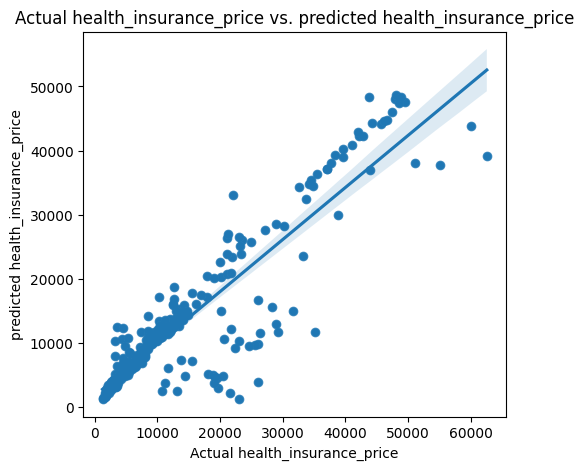

In [89]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [90]:
# checking the metrics for RFR
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3113.5441384182
MSE: 33978065.94502492
RMSE: 5829.070761710216
Adjusted R^2: 0.9761104122980105


#Support Vector Machines

In [91]:
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [92]:
y_pred1 = regressor.predict(X_test) # prediciting y

In [93]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 9309.005171151472
MSE: 204845616.32290965
RMSE: 14312.428735994099


Text(0, 0.5, 'predicted health_insurance_price')

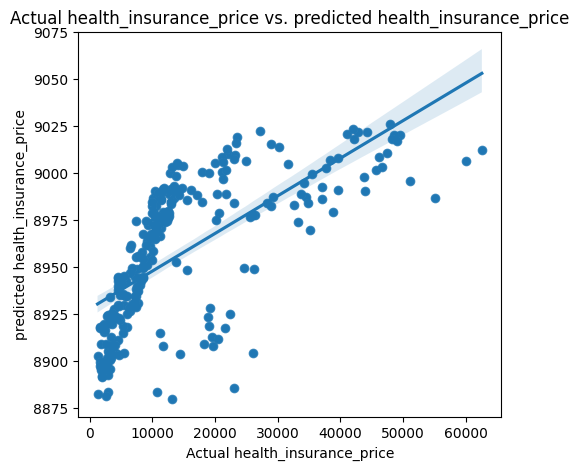

In [94]:
# plotting actual and predicted values using scatterplot below
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred1, ax=ax1)
sns.regplot(x = y_test, y=y_pred1, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

This was done without scaling let's see if we can observe any difference if we scale the data.

In [95]:
#after scaling
# Importing SVR library and creating model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [96]:
y_pred1 = regressor.predict(X_test) # prediciting y

In [97]:
# Calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("Adjusted R^2:",(1 - (1-regressor.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 9309.005171151472
MSE: 204845616.32290965
RMSE: 14312.428735994099
Adjusted R^2: -0.11171180784847201


Text(0, 0.5, 'predicted health_insurance_price')

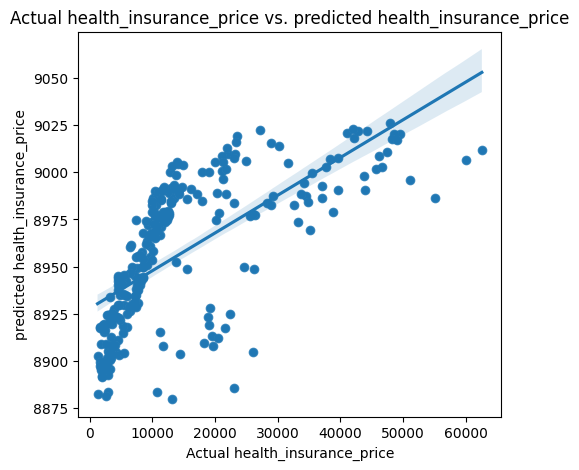

In [98]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred1, ax=ax1)
sns.regplot(x = y_test, y=y_pred1, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

Seems a lot of improvement after scaling the data.

That said, RF worked the same with or without scaling. I have checked it and you can also do it.

#XGBOOST

In [99]:
!pip install xgboost

In [100]:
import xgboost as xgb


In [101]:
#We have to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 10)

In [102]:
#Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:20:48] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [103]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 11278.576329


In [104]:
#Adjusted R^2
print("Adjusted R^2:",(1 - (1-xg_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

Adjusted R^2: 0.32622343762623995


Text(0, 0.5, 'predicted health_insurance_price')

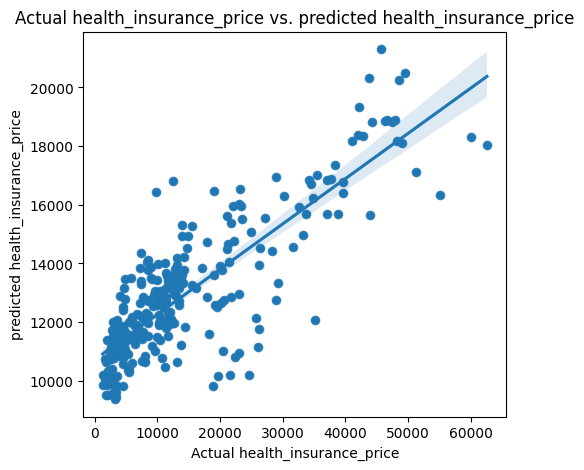

In [105]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = preds, ax=ax1)
sns.regplot(x = y_test, y=preds, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

#Decision Tree Regressor

In [106]:
# importing DecisionTreeRegressor from sklearn library
from sklearn.tree import DecisionTreeRegressor


In [107]:
#creating an object for our model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [108]:
# we have to #Compute the rmse by invoking the mean_sqaured_error function from sklearn's
#metrics module.
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 6221.332700


Text(0, 0.5, 'predicted health_insurance_price')

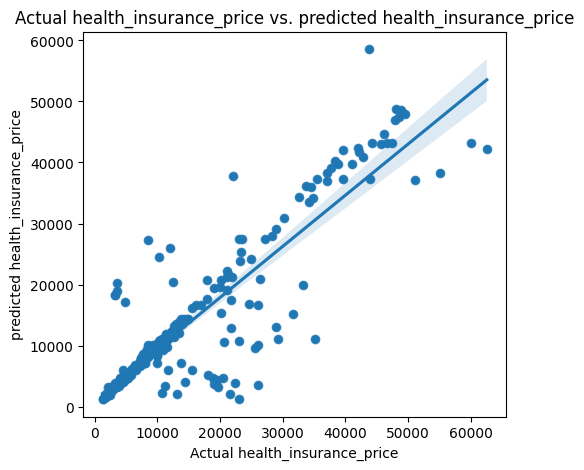

In [109]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

In [110]:
from sklearn import tree
#model = tree.DecisionTreeRegressor(random_state=44)
#model.fit(X_train, y_train)
#tree.plot_tree(model)

In [111]:
#adding graphics to the tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

It is splitting till the leaf node hence a big tree but we can tune it later.

In [113]:
model.score(X_train,y_train) #R^2 close to 1

0.9981942449980736

In [114]:
model.score(X_test,y_test)


0.7729067994499237


Apparently, our model is overfiting the training data. therefore, we need to initialize hyperparameters to our model to avoid letting it split till the leafnode.

We got almost 100% score on training data.

On test data we got 77% score.

That's why we are getting high score on our training data and less score on test data.

Let's perform hyperparameter tuning to address this issue.

There are ample tuning methods but we are going to use GridSearch or RandomizedSearch for hyper parameters tuning.

In [115]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
# importing gridsearchcv

#from sklearn.model_selection import GridSearchCV


In [ ]:
#tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
#tuning_model.fit(X_train,y_train) # it takes a lot of time to train hence I am avoiding this and using randomised searchcv

In [ ]:
# best hyperparameters
#tuning_model.best_params_

In [ ]:
#tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [116]:
# I am choosing RandomizedSearch CV because of it's perks which we have gone through during your classes.
from sklearn.model_selection import RandomizedSearchCV

In [119]:
RS = RandomizedSearchCV(estimator=model,param_distributions=parameters,cv=5,n_iter=300,n_jobs=-1, verbose=True, scoring='neg_mean_squared_error')

In [121]:
RS.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
850 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
171 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                                                                     0.7, 0.8,
                                                                     0.9],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error', verbose=True)

In [122]:
#let’s check the best parameters and the best score
print('Best Parameters:',RS.best_params_,end='\n\n')
print('Best Score:',RS.best_score_)

Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 4, 'max_leaf_nodes': 70, 'max_features': None, 'max_depth': 9}

Best Score: -30896961.35437845


In [123]:
tuned_model= DecisionTreeRegressor(max_depth=9,max_features=None,max_leaf_nodes=20,
                                         min_samples_leaf=4,min_weight_fraction_leaf=0.1,splitter='best')

In [124]:
# fitting model

tuned_model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=9, max_leaf_nodes=20, min_samples_leaf=4,
                      min_weight_fraction_leaf=0.1)

In [125]:
# prediction

tuned_pred=tuned_model.predict(X_test)

Text(0, 0.5, 'predicted health_insurance_price')

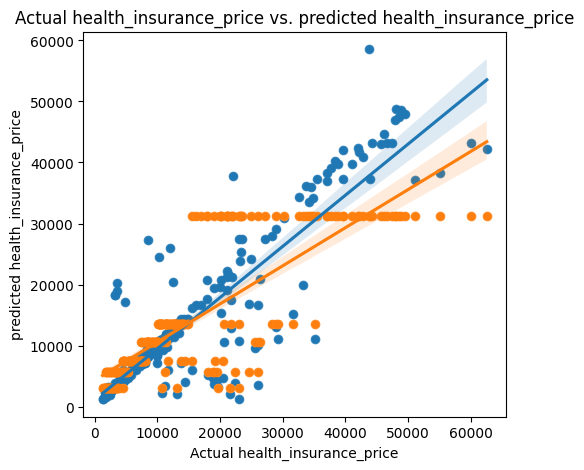

In [126]:
#before and after tuning

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])


sns.scatterplot(x = y_test, y = predictions, ax=ax1)
sns.regplot(x = y_test, y=predictions, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

There is a significant improvement post tuning and looks the model is performing well comparitively

In [127]:
#model's score on training data
tuned_model.score(X_train,y_train)

0.704135977046821

In [128]:
#model's score on test data
tuned_model.score(X_test,y_test)


0.6556649337242233

You can see the difference between the R^2 values with and without hyperparameter tuning.
Earlier, it was overfitting on the training data but it did not overfit post hyperparameter tuning.

Error rate of our model with hyperparameter tuning to our original model which is without the tuning of parameters.

In [129]:
# With hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print("Adjusted R^2:",(1 - (1-tuned_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 4860.800670693239
MSE: 58687279.13171234
RMSE: 7660.762307480394
Adjusted R^2: 0.7018903298137797


In [130]:
# without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Adjusted R^2:",(1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 2971.1217125939847
MSE: 38704980.56948497
RMSE: 6221.332700433643
Adjusted R^2: 0.9981805390777554


If we observe the results, performing hyperparameter tuning did not help us. It means hyperparameter tuning may not fruitful everytime.

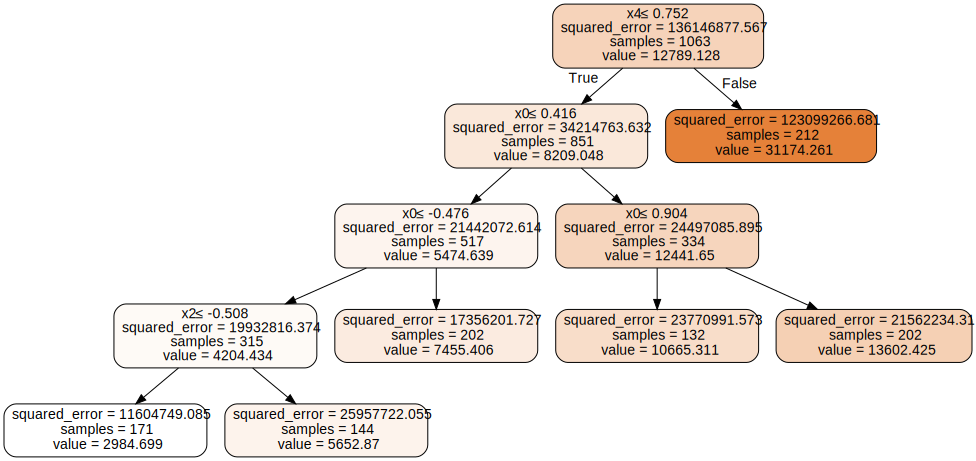

In [131]:
#Visualising the decision tree post tuning
import graphviz
dot_data = tree.export_graphviz(tuned_model, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

#Hyper parameter tuning for Random Forest Regressor

In [138]:
# Hyper parameters range intialization for tuning
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
parameters={'n_estimators': n_estimators,
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           'min_samples_split': min_samples_split,
           "max_features":["auto","sqrt",None]
           }

In [137]:
RRF = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10,n_jobs=-1)
#cross validation is 5 with n_jobs = -1 ( that is parallel processing

# fit the object
RRF.fit(X_train, y_train)

# Display the best estimator
print(RRF.best_estimator_)

# Display the best score
print(RRF.best_score_)

# Display the best selected parameter by the randomizedSearchCV
print(RRF.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomForestRegressor(max_depth=12, max_features=None, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=500)
0.8527772469317487
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 12}


In [134]:
# training the RandomForestRegressor with best parameters determined using randomizedSearchCV
tuned_rf= RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400)

In [140]:
# training the RandomForestRegressor with best parameters determined using randomizedSearchCV
tuned_rf= RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400) # Changed max_features to 'sqrt'

In [142]:
# training the RandomForestRegressor with best parameters determined using randomizedSearchCV
tuned_rf= RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=10, n_estimators=400) # Changed max_features to 'sqrt'

# Fit the model to your training data
tuned_rf.fit(X_train, y_train) # Added this line to fit the model

# prediction
tuned_rf_pred=tuned_rf.predict(X_test)

In [143]:
#random forest in it's naive form
rf.score(X_train,y_train)

0.976290371527404

In [144]:
rf.score(X_test,y_test) # R^2 value pre tuning

0.8006409606612563

In [145]:
#R^2 value of training data post tuning

tuned_rf.score(X_train,y_train)

0.7768901746213978

In [146]:
tuned_rf.score(X_test,y_test)

0.6850358742460726

Text(0, 0.5, 'predicted health_insurance_price')

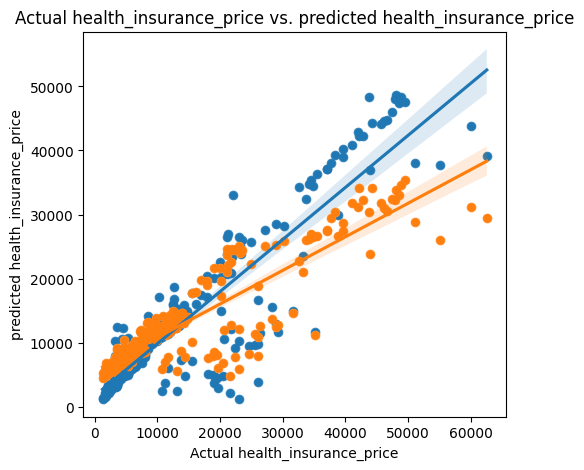

In [147]:
#Before and After hyper parameter tuning of RandomForestRegressor(RFR)
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, 0])

sns.scatterplot(x = y_test, y = y_pred, ax=ax1)
sns.regplot(x = y_test, y=y_pred, ax=ax1)

sns.scatterplot(x = y_test, y = tuned_rf_pred, ax=ax1)
sns.regplot(x = y_test, y=tuned_rf_pred, ax=ax1)

ax1.set_title("Actual health_insurance_price vs. predicted health_insurance_price")
ax1.set_xlabel('Actual health_insurance_price')
ax1.set_ylabel('predicted health_insurance_price')

By looking at the above graph you can estimate that errors will be lesser post performing hyperparameter tuning.

In [148]:
# With hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 4938.953713207616
MSE: 53681397.49610168
RMSE: 7326.759003550047
Adjusted R^2: 0.7751967414116929


In [149]:
# Without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

MAE: 3113.5441384182
MSE: 33978065.94502492
RMSE: 5829.070761710216
Adjusted R^2: 0.9761104122980105


In [150]:
print(" Without vs with parameter tuning metrics")
print('MAE:', metrics.mean_absolute_error(y_test,y_pred),"|"*5, 'MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred), "|"*5, 'MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)),"|"*5,'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))
print("Adjusted R^2:",(1 - (1-rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),"|"*5,"Adjusted R^2:",(1 - (1-tuned_rf.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

 Without vs with parameter tuning metrics
MAE: 3113.5441384182 ||||| MAE: 4938.953713207616
MSE: 33978065.94502492 ||||| MSE: 53681397.49610168
RMSE: 5829.070761710216 ||||| RMSE: 7326.759003550047
Adjusted R^2: 0.9761104122980105 ||||| Adjusted R^2: 0.7751967414116929


In [151]:
pip install yellowbrick

In [153]:
#checking residuals for RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot

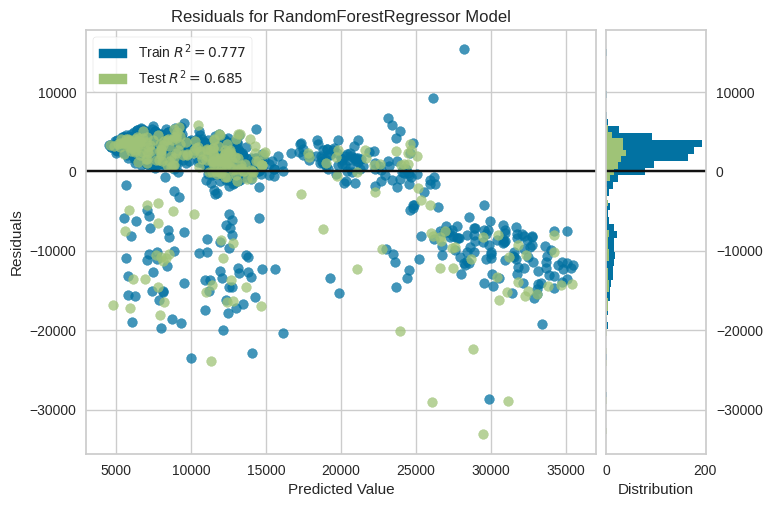

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [154]:
visualizer=ResidualsPlot(tuned_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

The coefficient of determination, or R^2,it is a statistical measure of how well the regression line approximates the actual data.

R^2= 0.777 of the variation in the y values from training data is accounted for by the x values.

R^2= 0.685 of the variation in the y values from training data is accounted for by the x values.

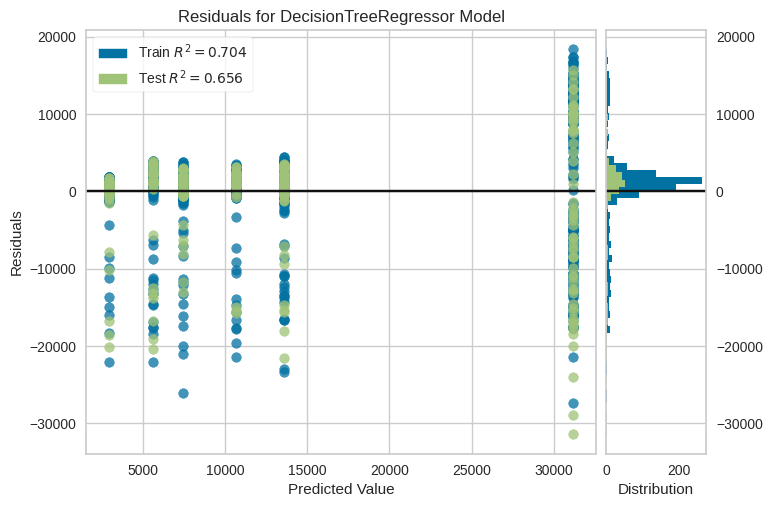

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [155]:
visualizer=ResidualsPlot(tuned_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

R^2= 0.704 of the variation in the y values from training data is accounted for by the x values.

R^2= 0.656 of the variation in the y values from training data is accounted for by the x values.

#cross validation

Note: You need to apply crossvalidation before hyperparameter tuning.
Also, you can create a machine learning pipeline if you like of encoding, feature engineering,crossvalidation, training, validatation, prediction, tuning etc.

In [156]:
# Performing crossvalidation to pick the best regression model
#Random Forest Regressor
from sklearn.model_selection import cross_val_score
score_train=cross_val_score(rf,X_train,y_train, scoring="neg_mean_squared_error",cv=10)

In [157]:
score_train

array([-13508535.43441814, -25900675.72389397, -22000977.04854709,
       -21388885.14633669, -13596278.07441674, -28889385.25043249,
       -20158288.53690754, -25384824.74472316, -24219430.85380589,
       -23708159.35802726])

In [158]:
from numpy import absolute
print(absolute(np.mean(score_train)))

21875544.017150898


In [159]:
score_test=cross_val_score(rf,X_test,y_test, scoring="neg_mean_squared_error",cv=10)

In [160]:
print(absolute(np.mean(score_test)))

35967037.92870535


In [161]:
#Decision Tree Regressor
score_t=cross_val_score(model,X_train,y_train, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_t)))

41341720.23033586


In [162]:
score_tt=cross_val_score(model,X_test,y_test, scoring="neg_mean_squared_error",cv=10)
print(absolute(np.mean(score_tt)))

60598757.763322875


If you observe crossvalscore of both training and test data of each model,RandomForest displayed lesser values for mean squared error comparitively.

> Add blockquote



In [163]:
#creating a barplot showcasing different metrics of decision trees and random forests

# initialize list of lists
d = [["Randomforestregressor without  HPT", 0.977255860524829,5882.6265994313035 ], ["Randomforestregressor with  HPT", 0.8785719603799325,5471.3380142056485]]

# Create the pandas DataFrame
df = pd.DataFrame(d, columns=['Modelname',"Adjusted R^2","RMSE"])

# print dataframe.
df

Modelname  Adjusted R^2         RMSE
0  Randomforestregressor without  HPT      0.977256  5882.626599
1     Randomforestregressor with  HPT      0.878572  5471.338014

<ipython-input-164-df4b086b4e21>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x="Modelname", y="Adjusted R^2",palette=["green","red"])


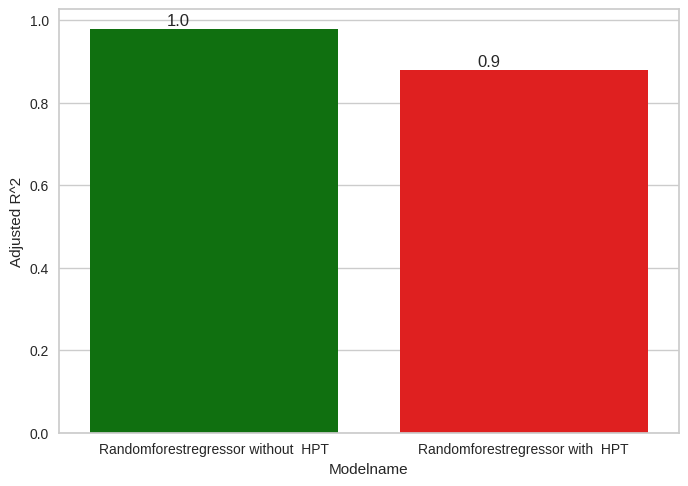

In [164]:
# comparing Adjusted R^2 values of Random Forest before and after tuning using barplot
ax=sns.barplot(data=df, x="Modelname", y="Adjusted R^2",palette=["green","red"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

<ipython-input-165-260921462312>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df, x="Modelname", y="RMSE",palette=["#fc9272","#7fcdbb"])


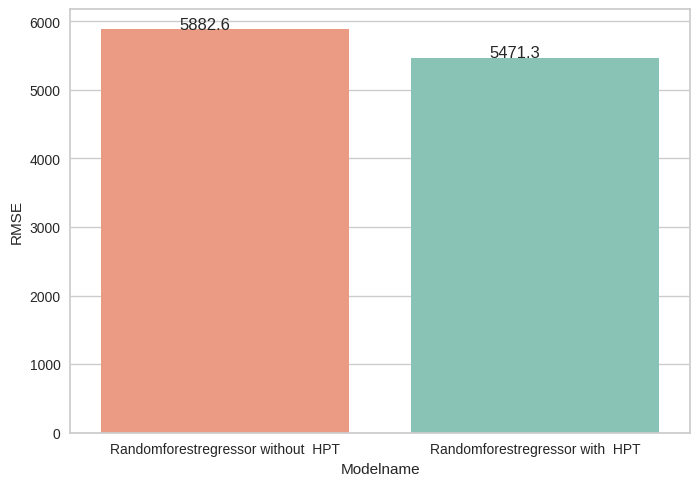

In [165]:
# comparing rmse values of Random Forest before and after tuning using barplot
ax=sns.barplot(data=df, x="Modelname", y="RMSE",palette=["#fc9272","#7fcdbb"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Similarly, you can create dataframes for all models and plot barplots accordingly.

#conclusion

Here, we performed 4 different models to check which model seems to give least error. We determined that Random Forest and Decision Tree are performing well but both of them overfitting. Therefore, we applied hyperparameter tuning and cross validation techniques to confirm {Random forest worked the best for this project}.

With that being said, you can perform [cv] for all the 4 models and choose the best model based on mean cross validation score and perform hyper parameter tuning from best to the last.

ex: Calculate RF metrics with HP tuning
Calculate DT metrics with HP tuning
so and so forth.

Moreover, it's the smoking status which has the most influence on health insurance price and random forest with hyperparameter tuning(model)that performed better out of all the models we tried.